# Linear Regression

### Dataset links
<a>https://www.kaggle.com/datasets/srolka/ecommerce-customers</a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
ecommerce_df = pd.read_csv('Ecommerce Customers.csv')

In [44]:
ecommerce_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [45]:
ecommerce_df.shape

(500, 8)

In [46]:
ecommerce_df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [47]:
ecommerce_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [48]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [49]:
corr_data = ecommerce_df.select_dtypes(include=['float64']).corr()

In [50]:
corr_data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Here, we can see that we have some strong correlations between some of the variables, for instance, between the Yearly Amount Spent and the Length of Membership

#### It's always a good idea to begin any regression analysis by examining the correlation matrix of your data.
This becomes especially important in the context of multiple regression, where if we have multiple x variables which are highly correlated to each other, that leads to an unstable regression. This is a problem known as multi-collinearity.


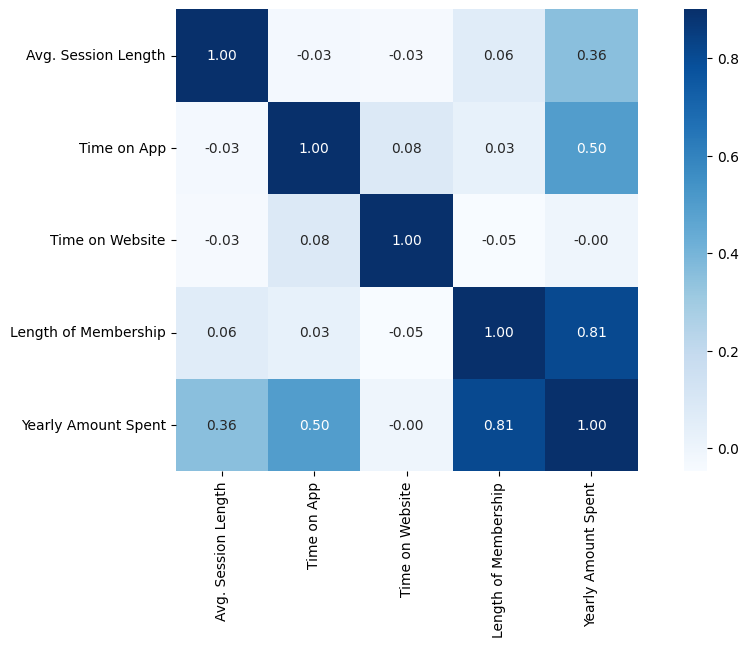

In [51]:
ax =  plt.subplots(figsize=(12,6))
sns.heatmap(corr_data, vmax=0.9, square=True, annot=True, fmt='0.2f',cmap='Blues');

Text(0, 0.5, 'Yearly Amount Spent')

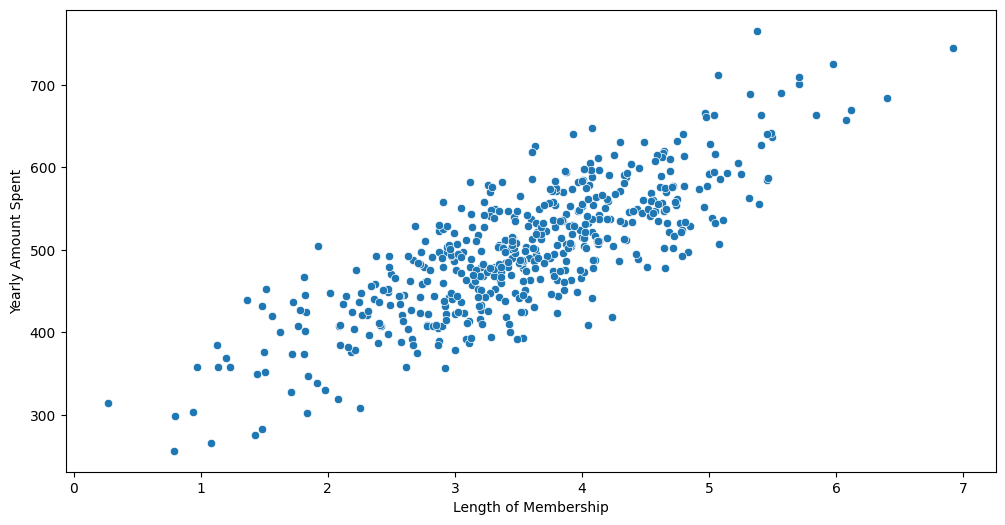

In [52]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Length of Membership', y = 'Yearly Amount Spent',data = ecommerce_df )
plt.ylabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')

In [53]:
ecom_subset = ecommerce_df[['Length of Membership','Yearly Amount Spent']]

In [54]:
ecom_subset.head()

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092


In [55]:
#et's shuffle the rows in this data frame just in order to ensure that there is no relationship encoded in the order of the rows. This is a good practice before we perform any kind of regression modeling, or indeed any kind of model building.
shuffeld_ecom_set = ecom_subset.sample(frac=1,random_state=3)
shuffeld_ecom_set.head()

,Length of Membership,Yearly Amount Spent
130,3.905250,552.940345
291,2.214798,378.473566
37,3.452389,490.738632
239,5.023934,538.774933
191,3.308443,476.766724


### Train and test Split

In [56]:
train_size = int(0.7 * len(ecommerce_df))

In [57]:
train_set = shuffeld_ecom_set[:train_size]
train_set.shape

(350, 2)

In [58]:
test_set = shuffeld_ecom_set[train_size:]
test_set.shape

(150, 2)

the reason that we've split our entire dataset in this particular way is because we'd like to create a regression equation using only the training data, and then use that regression line that we obtained from that regression analysis to predict values from the test data.

And we won't have no contamination of the training process with the values that we will be using in prediction. This idea of splitting a dataset into train and test components is a common one, and it helps to eliminate the problem of overfitting. Overfitting is a phenomenon where the machine learning model learns by rote the data that it's got to predict. Of course, this is bad because that means that when it's presented with new data, which it has not learned by rote, its performance will suffer.


**Please note that this definition of variance is known as the population variance. If we were computing the sample variance, we'd apply something known as Bessel's correction. And in Bessel's correction, the denominator would be the length of values minus one.**

Depending on your use case, both the population variance and the sample variance formulae might make sense. Here we've gone with the population variance. And that's because it's the population variance formula that's used in the analytic or the closed-form solution for ordinary least squares. That does it for the variance.

In [66]:
def mean(values):
    return sum(values)/ float(len(values))

def covarience(x, mean_x, y, mean_y):
    numerator = 0.0
    
    for i in range(len(x)):
        numerator += (x[i] - mean_x) * (y[i] - mean_y)
    return numerator/len(x)

def variance(values, mean):

    return sum([(x-mean)**2 for x in values])/len(values)


In [64]:
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    
    x_mean, y_mean = mean(x), mean(y)
    
    slope = covarience(x,x_mean, y, y_mean)/variance(x,x_mean)
    
    intercept = y_mean - slope * x_mean
    
    return [intercept, slope]

In [61]:
train_set = train_set.to_numpy()

In [62]:
test_set = test_set.to_numpy()

In [67]:
intercept, slope = coefficients(train_set)

In [69]:
print('Coefficients: intercept=%.3f, slope=%.3f' %(intercept,slope))

Coefficients: intercept=269.084, slope=64.815


In [70]:
x = train_set[:,0]
y = train_set[:,1]

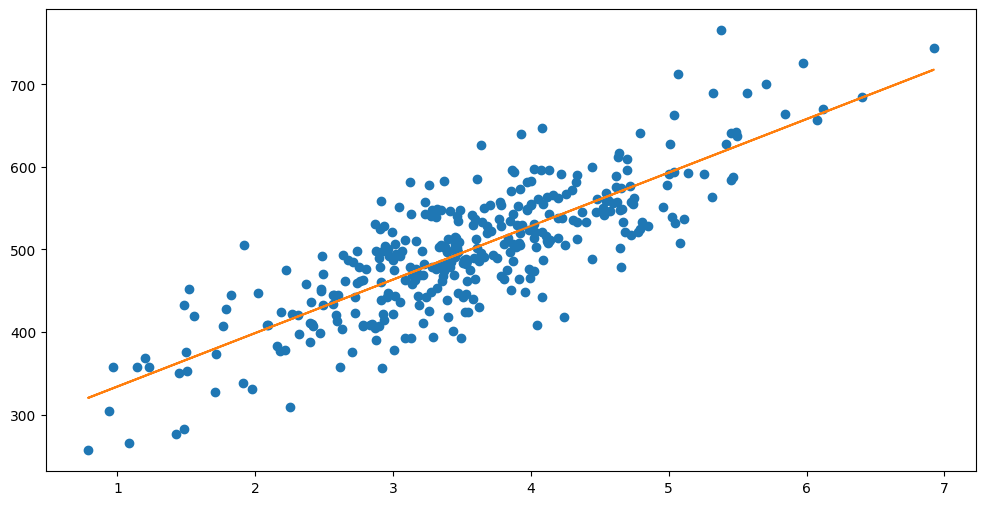

In [72]:
f, ax = plt.subplots(figsize=(12,6))

plt.plot(x,y,'o')
plt.plot(x,slope*x+intercept)

In [75]:
def make_prediction(train,test):
    """Try to make prediction using the train data"""
    predictions = []
    intercept, slope = coefficients(train)
    
    for row in test:
        y_pred = intercept + slope * row[0]
        predictions.append(y_pred)
    return predictions

In [77]:
y_pred = make_prediction(train_set, test_set)
y_pred = np.array(y_pred)
y_pred[:10]

array([475.49494087, 532.52758114, 531.01715993, 502.80248179,
       566.85154212, 515.81324891, 481.2514781 , 388.22753265,
       386.34912249, 464.99861454])

In [78]:
y_test = test_set[:,1]
y_test[:10]

array([518.06455798, 605.0610388 , 541.04983096, 618.84597042,
       614.72963763, 423.3083341 , 570.20040896, 302.18954781,
       374.26967454, 424.72877393])

we have performed the regression analysis now we need to perform the model has to be test that it have given good analysis of the result

In [79]:
data_actual_prediction = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred
})

In [80]:
data_actual_prediction

,Actual Value,Predicted Value
0,518.064558,475.494941
1,605.061039,532.527581
2,541.049831,531.017160
3,618.845970,502.802482
4,614.729638,566.851542
...,...,...
145,499.140152,499.114648
146,573.306222,587.994289
147,518.786483,504.686141
148,555.892595,618.519341


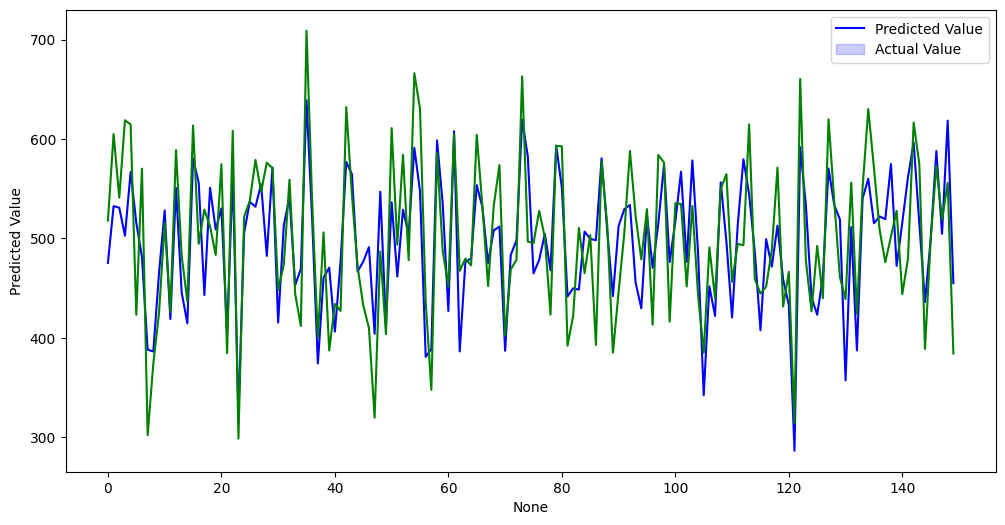

In [82]:
f, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x=data_actual_prediction.index,y='Predicted Value',color='blue',data=data_actual_prediction,ax=ax)
sns.lineplot(x=data_actual_prediction.index, y='Actual Value', color='green',data=data_actual_prediction,ax=ax)
plt.legend(['Predicted Value','Actual Value'])

In [83]:
def cal_mse(y_pred, y_actual):
    error = np.square(np.subtract(y_actual, y_pred)).mean()
    return error

In [84]:
def calc_r_square(y_pred, y_actual):
    sst = np.sum((y_actual - y_actual.mean()) ** 2)
    
    ssr = np.sum((y_pred-y_actual)**2)
    
    r_sq = 1 - (ssr/sst)
    return r_sq

In [85]:
calc_r_square(y_pred, y_test)

0.6222698417167607

#Remember that the mean square error is effectively the variance of the residuals.


In [88]:


print('Mean Square error', cal_mse(y_pred, y_test))

print('Root Mean Square Error:', (cal_mse(y_pred, y_test))**0.5)


Mean Square error 2370.6612358306793
Root Mean Square Error: 48.68943659389251


we've not performed any standardization or scaling of our x and y variables. That's really only required compulsorily when you're working with gradient descent.

It is, however, a good practice to perform standardization when you have multiple x variables, even if you don't strictly need them from the perspective of the solution procedure.

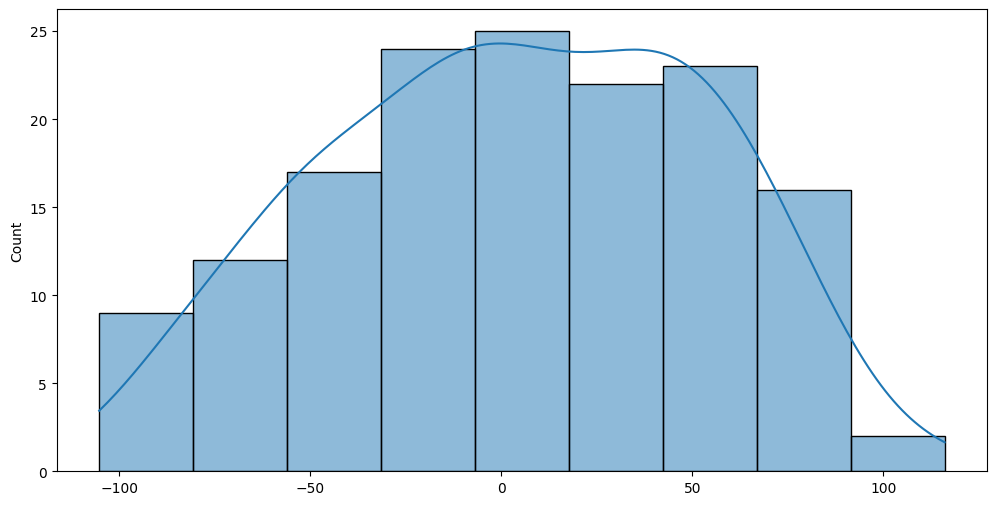

In [89]:
f,ax = plt.subplots(figsize=(12,6))
sns.histplot(data=(y_test-y_pred),kde=True, legend=False)
plt.show()

So by looking at this histogram and KDE curve of the residuals, we get a sense that our residuals might be close to normally distributed.

And that's a very good sign. An alternative way of performing a similar check is using the Q-Q plot or quantile-quantile plot of the residuals. Another important technique for analyzing the results of a regression is to view a scatterplot of the residuals. That's exactly what we have on-screen now. We've plotted this scatterplot by invoking sns.residplot. 

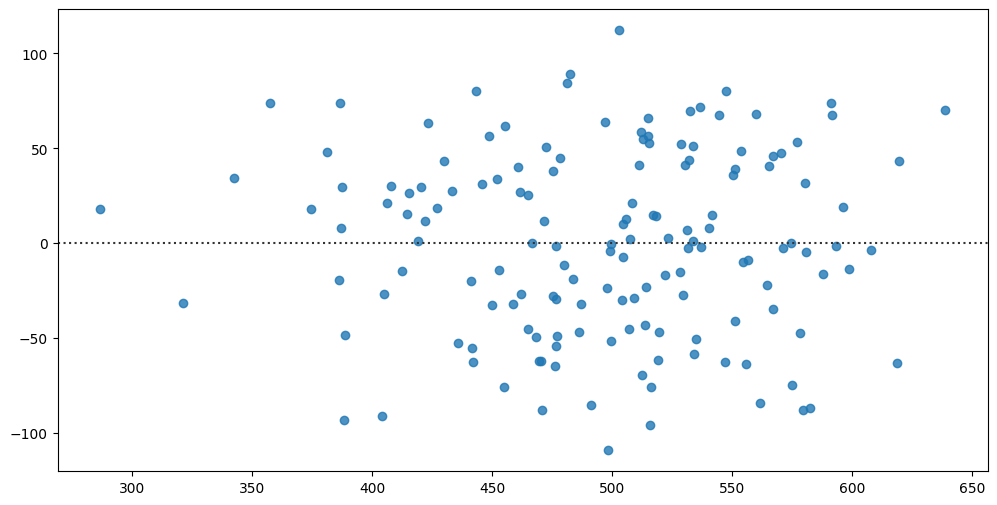

In [90]:
f, ax = plt.subplots(figsize=(12,6))
sns.residplot(x=y_pred,y=(y_test-y_pred))
plt.show()

This scatterplot looks quite reassuring. **A good quality regression should have residuals, which are distributed literally at random on the scatterplot. There shouldn't be any discernible pattern. And looking at this scatterplot, it doesn't seem like there is any discernible pattern. So the residuals do indeed seem to be noise, which is exactly how it should be for a good regression fit.** And this means that we have yet another sign that this regression analysis was a good one.

## Performing Regression with Built-in Modules

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import math

there are many libraries in Python to perform analysis like regression analysis.
<br>
<br>
And each one of those libraries has its own quirks regarding the exact format of the data that it would like to take in.
we'd like to make sure that it's arranged as column data. And so we specify the second dimension as +1. The first dimension we specify as -1. This is a way of telling numpy make sure that this first dimension takes on the correct value to match the second dimension. 

In [104]:
X_train = train_set[:,0]
X_train = X_train.reshape((-1,1))
X_train[:10]

array([[3.90525031],
       [2.21479752],
       [3.45238858],
       [5.0239342 ],
       [3.308443  ],
       [5.84050588],
       [4.01947035],
       [2.99636453],
       [3.97452248],
       [2.78275783]])

In [105]:
Y_train = train_set[:,1]
Y_train = Y_train.reshape((-1,1))

X_train.shape, Y_train.shape

((350, 1), (350, 1))

In [106]:
X_test = test_set[:,0]
X_test = X_test.reshape((-1,1))

Y_test = test_set[:,1]
Y_test = Y_test.reshape((-1,1))

X_test.shape,Y_test.shape

((150, 1), (150, 1))

In [107]:
lr = LinearRegression()
linear_reg_model = lr.fit(X_train,Y_train)

In [108]:
linear_reg_model.coef_

array([[64.81498242]])

In [110]:
linear_reg_model.intercept_

array([269.0839383])

In [111]:
y_pred = linear_reg_model.predict(X_test)

In [114]:
print('Training Score', linear_reg_model.score(X_train,Y_train))

print('Mean Square Error:', mean_squared_error(Y_train, linear_reg_model.predict(X_train)))

print('Root Mean Square Error:', math.sqrt(mean_squared_error(Y_train, linear_reg_model.predict(X_train))))




Training Score 0.6680345390509539
Mean Square Error: 2084.320022005773
Root Mean Square Error: 45.65435381215874


In [115]:
print('Training Score', linear_reg_model.score(X_test,Y_test))

print('Mean Square Error:', mean_squared_error(Y_test, linear_reg_model.predict(X_test)))

print('Root Mean Square Error:', math.sqrt(mean_squared_error(Y_test, linear_reg_model.predict(X_test))))




Training Score 0.622269841716761
Mean Square Error: 2370.6612358306775
Root Mean Square Error: 48.689436593892495
